In [32]:
import pandas as pd
import numpy as np
import math

In [34]:
df=pd.read_csv('/kaggle/input/sensordata/sensor_data_csv.csv')
df

,Num,Sensor,G1,G2,G3,G4,G5
0,1,S1_245,6.151,6.199,4.184,4.539,4.369
1,2,S2_245,5.280,5.042,13.327,4.934,2.014
2,3,S3_245,3.355,3.279,8.918,2.780,1.697
3,4,S4_245,4.012,4.227,3.751,3.297,3.539
4,5,S1_285,5.506,5.051,3.312,5.377,6.678
5,6,S2_285,5.137,5.246,13.328,5.178,3.293
6,7,S3_285,3.349,3.424,8.645,2.943,3.026
7,8,S4_285,3.761,3.505,1.339,3.203,4.906
8,9,S1_310,3.281,4.240,2.162,4.695,5.683
9,10,S2_310,3.868,4.467,5.959,4.261,2.429


In [35]:
df

,Num,Sensor,G1,G2,G3,G4,G5
0,1,S1_245,6.151,6.199,4.184,4.539,4.369
1,2,S2_245,5.280,5.042,13.327,4.934,2.014
2,3,S3_245,3.355,3.279,8.918,2.780,1.697
3,4,S4_245,4.012,4.227,3.751,3.297,3.539
4,5,S1_285,5.506,5.051,3.312,5.377,6.678
5,6,S2_285,5.137,5.246,13.328,5.178,3.293
6,7,S3_285,3.349,3.424,8.645,2.943,3.026
7,8,S4_285,3.761,3.505,1.339,3.203,4.906
8,9,S1_310,3.281,4.240,2.162,4.695,5.683
9,10,S2_310,3.868,4.467,5.959,4.261,2.429


In [41]:
# Converting pandas dataframe to numpy array for computation
numpy_array = df.values
numpy_array = numpy_array[:, 2:]
print(numpy_array)
print(numpy_array.shape)

[[6.151 6.199 4.184 4.539 4.369]
 [5.28 5.042 13.327 4.934 2.014]
 [3.355 3.279 8.918 2.78 1.697]
 [4.012 4.227 3.751 3.297 3.539]
 [5.506 5.051 3.312 5.377 6.678]
 [5.137 5.246 13.328 5.178 3.293]
 [3.349 3.424 8.645 2.943 3.026]
 [3.761 3.505 1.339 3.203 4.906]
 [3.281 4.24 2.162 4.695 5.683]
 [3.868 4.467 5.959 4.261 2.429]
 [2.343 2.942 4.412 2.659 2.086]
 [2.379 3.123 0.656 3.382 4.215]
 [5.602 4.847 0.967 5.645 3.837]
 [6.575 6.261 8.528 7.57 4.847]
 [4.504 4.313 6.255 5.108 4.545]
 [4.315 3.532 0.344 4.158 3.236]
 [8.0 7.98 0.657 7.088 9.669]
 [9.593 9.301 6.875 10.997 11.023]
 [6.978 7.248 6.101 7.328 10.353]
 [6.013 5.773 0.372 4.859 8.554]]
(20, 5)


In [42]:
# Utility functions for calculation of SRSS and SED

def SRSS(array):
  srss = 0
  for row in array:
    rms = 0
    for ele in row:
      rms += ele**2
    rms = math.sqrt(rms)
    srss += rms
  return srss

def euclidean_distance(array1, array2):
  distance = 0
  for i in range(len(array1)):
    distance += (array1[i] - array2[i])**2
  return math.sqrt(distance)

def SED(array):
  sed = 0
  length = len(array[0])
  for i in range(length - 1):
    for j in range(i + 1, length):
      sed += euclidean_distance(array[:, i], array[:, j])
  return sed


In [43]:
# Elimination of one of the sensors

def eliminate(array):
  length = len(array)
  dic = {}
  # min_key=None
  for i in range(1,length):
    if(array[i].all()!=0):
      temp_array = np.delete(array, i, axis=0)
      srss = SRSS(temp_array)
      sed = SED(temp_array)
      dic[i] = [sed, srss, (srss+sed) / 2]
  # print(dic)
  min_key = max(dic, key=lambda k: dic[k][2])
  # print(f"{min_key+1}th Sensor will be removed.\n")
  array[min_key]=0
  return array,min_key



In [44]:
# SED and SRSS of complete array
sed = SED(numpy_array)
srss = SRSS(numpy_array)
avg = (sed + srss) / 2
print(f"SED : {sed}, SRSS : {srss}, AVG : {avg}\n")


SED : 113.5262358013415, SRSS : 238.77208476605503, AVG : 176.14916028369828



In [45]:
# Stepwise elimination
eliminated_sensors=[]
for i in range(len(numpy_array)-3):
  required_sensors,k = eliminate(numpy_array)
  eliminated_sensors.append(k);
print(required_sensors)
print(eliminated_sensors)

[[6.151 6.199 4.184 4.539 4.369]
 [5.28 5.042 13.327 4.934 2.014]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [5.137 5.246 13.328 5.178 3.293]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[10, 11, 3, 7, 15, 9, 8, 14, 12, 4, 6, 2, 13, 19, 18, 17, 16]


In [53]:
import matplotlib.pyplot as plt

rows =17
columns =20

grid = np.ones((rows, columns))

color_mapping={}

for i in range(rows):
  color_mapping[i] = eliminated_sensors[i]



In [54]:
print(color_mapping)


{0: 10, 1: 11, 2: 3, 3: 7, 4: 15, 5: 9, 6: 8, 7: 14, 8: 12, 9: 4, 10: 6, 11: 2, 12: 13, 13: 19, 14: 18, 15: 17, 16: 16}


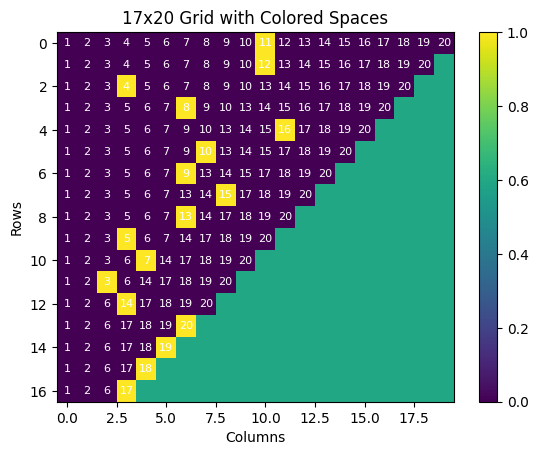

In [55]:
# Apply the coloring to the grid
import matplotlib.pyplot as plt
import numpy as np

# Create a 20x17 grid initialized with ones (white)
grid = np.ones((17, 20))

# Define color mapping with rows as keys and a list of columns to color as values
array = list(range(20))

for i in range(0, len(color_mapping)):
  for j in range(0, len(array)):
    grid[i][j] = 0.6

for i in range(0, len(color_mapping)):
  ele = color_mapping[i];
  for j in range(0, len(array)):
    if(array[j] == ele): ele = j
    grid[i][j] = 0
    plt.text(j, i, str(array[j] + 1), color='white', ha='center', va='center', fontsize=8)
  grid[i][ele] = 1

  array.remove(array[ele])


# Choose a colormap with distinct colors for visualization
plt.imshow(grid, cmap='viridis', aspect='auto')  # Use a color colormap
plt.title("17x20 Grid with Colored Spaces")
plt.xlabel("Columns")
plt.ylabel("Rows")







plt.colorbar()  # Display a color bar for the colormap
plt.show()


In [56]:
print("\nFinal Values")
sed = SED(required_sensors)
srss = SRSS(required_sensors)
avg = (sed + srss) / 2
print(f"SED : {sed}, SRSS : {srss}, AVG : {avg}\n")


Final Values
SED : 65.47938460868832, SRSS : 44.06286499176707, AVG : 54.771124800227696



In [57]:
print("Required sensors are:")
for i in range(len(required_sensors)):
  if required_sensors[i].all()!=0:
    print(df['Sensor'][i])


Required sensors are:
S1_245
S2_245
S2_285
